# 18/01/2024 Difference of the mean CPI USA and UK

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [9]:
CPI_USA = pd.read_csv("CPI_USA.csv")["Actual"]
CPI_UK = pd.read_csv("CPI_UK.csv")["Actual"]

Now that we have our data of the CPI from our USA and UK we are going to apply inferencial statistc and the central limit theorem in order to see what is the difference between these two CPIs, but first we need to sample our data.

Since the data is on a monthly basis we are going to sample a trymester, a sample of 3 reports from the total population. If we want to take every possible sample with replacement it would be **N ** n** which is the lenght of the CPI_USA ** 3 and the same for the UK. 

In [12]:
len(CPI_USA)

634

In [64]:
len(CPI_UK)

424

In [24]:
CPI_USA = list(CPI_USA)
CPI_UK = list(CPI_UK)

In [21]:
import itertools 

In [23]:
# list(itertools.product(CPI_USA, repeat = 3)) this are all the possible samples of 3

We are going to take a sample of 40 from the CPI of the USA and the UK, a sample larger than 30 and both of these populations which are normal distributed is a good reason to apply the central limit theorem and Z scores instead of T scores, we can support and predict how likely it is that the USA has less inflation than the UK and viceversa on avergae and how much. 

In [136]:
random_40_USA = np.random.choice(CPI_USA, size = 40)

In [113]:
random_40_UK = np.random.choice(CPI_UK, size = 40)

# Now let's plot the sample distributions of these two CPIs

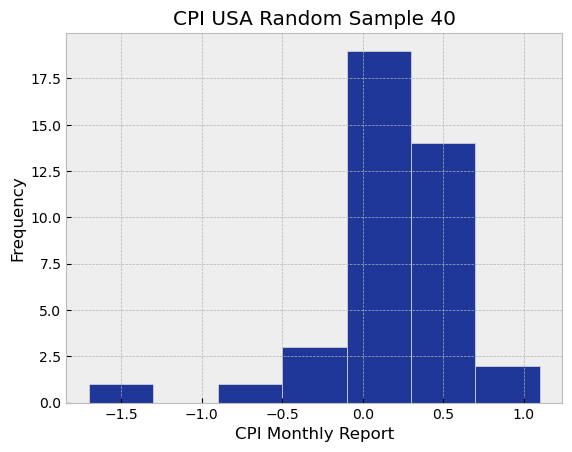

In [165]:
plt.hist(random_40_USA, edgecolor = "#dcdde1", color = "#1e3799", bins = 7)
plt.title("CPI USA Random Sample 40")
plt.xlabel("CPI Monthly Report")
plt.ylabel("Frequency")
plt.show()

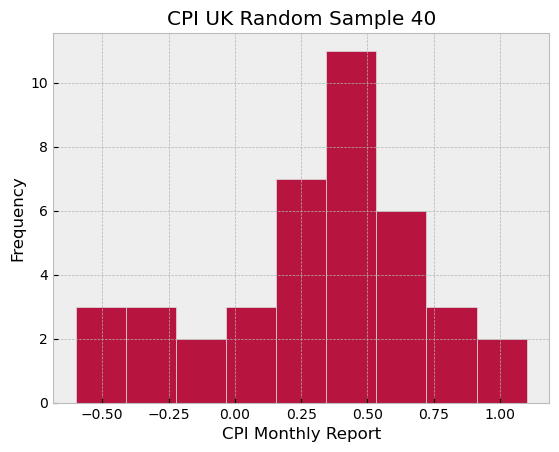

In [166]:
plt.hist(random_40_UK, edgecolor = "#dcdde1", color = "#b71540", bins = 9)
plt.title("CPI UK Random Sample 40")
plt.xlabel("CPI Monthly Report")
plt.ylabel("Frequency")
plt.show()

In [139]:
measures_uk = pd.Series(random_40_UK).describe()
measures_usa = pd.Series(random_40_USA).describe()

In [140]:
description = pd.concat([measures_usa, measures_uk], axis = 1)

In [167]:
description.rename(columns = {0 : "USA", 1 : "UK"}) # this is teh description for the samples

,USA,UK
count,40.000000,40.000000
mean,0.222500,0.305000
std,0.464365,0.413211
min,-1.700000,-0.600000
25%,0.100000,0.100000
50%,0.200000,0.400000
75%,0.500000,0.600000
max,1.100000,1.100000


The mean of the sample distributions of the sample mean is the same as the mean of its respective populations, we can't compute the sample distribution of the sample mean but we have the mean of the populations and the mean of one sample of 40 for each CPI, the USA and the UK. 

In [142]:
round(np.mean(CPI_USA), 2)

0.33

In [143]:
round(np.mean(CPI_UK), 2)

0.21

These two means of the populations are very similar to their respective samples of 40, however, the standar deviation of the (SDSM) also known as standard error is the standard deviation of the population divided by the square root of the sample size in this case 40.

In [144]:
SE_USA = round(np.std(CPI_USA) / np.sqrt(40), 2)
SE_USA

0.05

In [145]:
SE_UK = round(np.std(CPI_UK) / np.sqrt(40), 2)
SE_UK

0.06

These standard errors represent the distance between any particular sample mean and the mean population. which are very close between these samples 

# Confidence interval for the difference of the means 

The goal of many statistical studies is to compair 2 populations often in terms of their means and we can build a confidence interval around the difference of the sample means, in this case, which population has a lower level of inflation? the US or the UK and by how much? we can stay 90% or 95% confident to support a particular assumption.

The difference between all the possible means from all possible samples of 40 can generate a distirbution aorund the difference of the means of the CPI of the USA and the UK, however, we are going to pick the difference between these two means of the samples to represent an estimate of the difference of the means of the true population and reports that are coming montly. 

In [168]:
dif_samples = round(description.iloc[1, 0] - description.iloc[1, 1], 2)
dif_samples 
# this is the difference of the mean of the samples and each sample deviates from the mean around of 0.05-0.06

-0.08

Now we need to calculate the standard error of the difference of the samples, but first we are going to take the variances of the two populations, because we know the populaion standard deviation of their respective samples. **Frist we calculate the variances**

In [147]:
var_usa = round(np.std(CPI_USA) ** 2, 2)
var_usa

0.11

In [148]:
var_uk = round(np.std(CPI_UK) ** 2, 2)
var_uk

0.14

In [149]:
SE_dif = round((var_usa / np.sqrt(40)) + (var_uk / np.sqrt(40)), 2)
SE_dif
# we need to sum up these fractions before square rooting them

0.04

In [150]:
SE_dif = round(np.sqrt(SE_dif), 2)
SE_dif # this is the standard error of the difference of the means

0.2

Let's apply the confidence interval formula for the difference of the means, We are going to use a confidence level of 95%, which means we have 0.025% of alpha values on both sides, the upper and lower tails and 1 - 0.025 = 0.975 which is a Z score assciated with a Z critical value of 1.96.

In [151]:
a, b = round(dif_samples - 1.96 * SE_dif, 2),  round(dif_samples + 1.96 * SE_dif, 2)

In [152]:
[a, b]

[-0.47, 0.31]

This suggest that **the difference of the means USA_CPI - UK_CPI may fall in some value between -0.47 and 0.31** the USA has a lower history of inflation than the UK, since we have a larger negative section in this interval, but in some cases, less than the mayority of the cases, the UK has a lower history of CPI records than the USA.

# Hypothesis testing for the difference of the means.

Is the difference of the CPI in the UK larger than the CPI of the USA by 0.3%? if the difference of the means in the UK is larger then it suggest that the british are exposed to suffer for a higher inflation rate on average.

+ **H0: CPI_UK - CPI_USA <= 0.3 or diff means <= 0.3**
+ **Ha: CPI_UK - CPI_USA > 0.3 or diff means > 0.3**

Now that we have stated our null and alternative hypothesis on a right tailed test let's apply the formula for the hypothesis testing for the difference of the means when we have known standard deviation for the population and our sample size is larger than 30.

In [154]:
dif_samples #However, this is the difference of the cpi usa minus cpi uk, so we need to swap them.

-0.08

In [155]:
dif_samples = round(description.iloc[1, 1] - description.iloc[1, 0], 2)
dif_samples

0.08

Now this is the difference of samples we want to take in order to apply the hypothesis testing of the differences of the means.

In [169]:
Z_critical = (dif_samples - 0.3) / SE_dif
Z_critical
# divide this differences by the standard error of the differences we used in the confidence interval formula

-1.9

**What can we conclude at a 95% confidence level?**

For a 95% confidence level on a upper tail test we have a **critical value of 1.96**, the critical value for this difference is **-1.90** which is inside of the confidence level for a 95% confidence, for this reason we fail to reject the null hypothesis, which means that there is statistical evidence that the difference of the means CPI_UK - CPI_USA is not 0.3. So the CPI in the UK is not larger than the USA by 0.3. 

**The P-Value ≈ 0.971283.** The p value on a right tailed test is calculated finding the Z score from the critical value of -1.9 which in this case is 0.0287, if we subtract 1 - 0.0287 = 0.9712 which is our p value.

**The result is not significant at p > .05.**